# Financial Analysis
### using 'Alphavantage' API

In [1]:
# Import dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy.stats import linregress
from config import api_key
from pprint import pprint

In [2]:
# Input company stock ticker #
print("Enter company stock ticker:")
ticker = (input()).upper()

# Company Info reports API url #
info_url = ("https://www.alphavantage.co/query?function=OVERVIEW&symbol=" + ticker + "&apikey=" + api_key)

# Intraday Trading reports API url (interval set at 15 minutes) #
intraday_url = ("https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=" + ticker + "&interval=15min&outputsize=full&apikey=" + api_key)

# Income Statement reports API url #
incstat_url = ("https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol=" + ticker + "&apikey=" + api_key)

# Balance Sheet reports API url #
balsheet_url = ("https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol=" + ticker + "&apikey=" + api_key)

# Cash Flow reports API url #
cf_url = ("https://www.alphavantage.co/query?function=CASH_FLOW&symbol="+ ticker + "&apikey="+ api_key)

# Get responses #
info_response = requests.get(info_url)
print(info_response)
info_data = info_response.json()

incstat_response = requests.get(incstat_url)
print(incstat_response)
incstat_data = incstat_response.json()

balsheet_response = requests.get(balsheet_url)
print(balsheet_response)
balsheet_data = balsheet_response.json()

cf_response = requests.get(cf_url)
print(cf_response)
cf_data = cf_response.json()

intraday_response = requests.get(intraday_url)
print(intraday_response)
intraday_data = intraday_response.json()

Enter company stock ticker:
snp
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


### Company Information 

In [3]:
# Print company information #
pprint(info_data)

The following is a basic financial analysis of the China Petroleum & Chemical Corporation
{'200DayMovingAverage': '45.7885',
 '50DayMovingAverage': '52.1761',
 '52WeekHigh': '58.4',
 '52WeekLow': '38.0666',
 'Address': 'No. 22 Chaoyangmen North Street, Beijing, China, 100728',
 'AnalystTargetPrice': '57.77',
 'AssetType': 'Common Stock',
 'Beta': '1.0756',
 'BookValue': '90.6',
 'Country': 'USA',
 'Currency': 'USD',
 'Description': 'China Petroleum & Chemical Corporation, an energy and '
                'chemical company, engages in oil and gas, and chemical '
                "operations in the People's Republic of China. It operates "
                'through five segments: Exploration and Production, Refining, '
                'Marketing and Distribution, Chemicals, and Corporate and '
                'Others. The company explores for and develops oil fields; '
                'produces crude oil and natural gas; processes and purifies '
                'crude oil; and manufactures 

#### Intraday Report <em>15 minute</em> intervals

In [29]:
# Generate Intraday reportings data frame
intraday15_df = pd.DataFrame(intraday_data['Time Series (15min)'])
intraday15_df = intraday15_df.T
intraday15_df

,1. open,2. high,3. low,4. close,5. volume
2021-03-08 16:00:00,57.5700,57.6800,57.4400,57.4500,17860
2021-03-08 15:45:00,57.6800,57.7600,57.5500,57.6600,5244
2021-03-08 15:30:00,57.7062,57.7100,57.5800,57.6400,5319
2021-03-08 15:15:00,57.7600,57.7700,57.6700,57.6700,3258
2021-03-08 15:00:00,57.8200,57.8500,57.7800,57.7800,2081
...,...,...,...,...,...
2021-01-26 10:00:00,49.1400,49.1437,49.0100,49.0400,16855
2021-01-26 09:45:00,49.4100,49.4800,49.1800,49.1800,31598
2021-01-26 09:30:00,49.4000,49.4000,49.4000,49.4000,100
2021-01-26 09:00:00,48.6600,48.6600,48.6600,48.6600,200


#### Income Statement <em>Quarterly</em> reportings data frames

In [6]:
# Generate Income Statement quarterly reportings as Pandas data frames #
incstat_quart_report_df = pd.DataFrame(incstat_data['quarterlyReports'])

# Convert columns to relevant data types - e.g. 'fiscalDateEnding' column as Time series, 'totalRevenue' as Numeric #  
incstat_quart_report_df.iloc[:, 2: ] = incstat_quart_report_df.iloc[:, 2: ].apply(pd.to_numeric, errors='ignore')
incstat_quart_report_df.iloc[:,0] = incstat_quart_report_df.iloc[:,0].apply(pd.to_datetime, errors='ignore')
incstat_quart_report_df.head(10)

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
0,2020-09-30,CNY,1.28207e+11,5.20371e+11,3.92164e+11,3.92164e+11,2.6529e+10,3.1828e+10,3147000000,4.92817e+11,...,None,None,6.483e+10,1.1814e+10,None,5.3224e+10,None,5.5309e+10,None,4.6184e+10
1,2020-06-30,CNY,9.9132e+10,4.78744e+11,3.79612e+11,3.79612e+11,4.804e+09,3.2976e+10,None,4.7394e+11,...,None,None,1.171e+09,1.727e+09,None,-5.56e+08,None,3.1744e+10,None,-2.58e+09
2,2020-03-31,CNY,4.611e+10,5.55502e+11,5.09392e+11,5.09392e+11,-2.6305e+10,2.9332e+10,None,5.81807e+11,...,None,None,-2.7814e+10,-7.529e+09,None,-2.0285e+10,None,3.22e+08,None,-1.9145e+10
3,2019-12-31,CNY,1.20725e+11,7.32888e+11,6.12163e+11,6.12163e+11,1.7858e+10,3.9604e+10,0,7.09197e+11,...,None,None,2.0501e+10,4.026e+09,None,1.6475e+10,None,5.6485e+10,None,1.3239e+10
4,2019-09-30,CNY,1.16619e+11,7.34309e+11,6.1769e+11,6.1769e+11,1.9202e+10,3.4205e+10,0,7.15107e+11,...,None,None,1.9345e+10,3.728e+09,None,1.5617e+10,None,5.0138e+10,None,1.202e+10
5,2019-06-30,CNY,1.19687e+11,7.81417e+11,6.6173e+11,6.6173e+11,2.4297e+10,3.405e+10,2697000000,7.5712e+11,...,None,None,2.5283e+10,4.601e+09,None,2.0682e+10,None,5.6563e+10,None,1.6738e+10
6,2019-03-31,CNY,1.19443e+11,7.17579e+11,5.98136e+11,5.98136e+11,2.4841e+10,2.8936e+10,1292000000,6.92738e+11,...,None,None,2.4798e+10,8.253e+08,None,1.9259e+10,None,5.4995e+10,None,1.5468e+10
7,2018-12-31,USD,1.09468e+11,8.18209e+11,7.08741e+11,7.08741e+11,-3.18191e+06,4.0853e+10,0,3.68209e+08,...,None,None,934963,-317164,None,1.25213e+06,None,3.1947e+10,None,653536
8,2018-09-30,USD,1.25208e+11,7.72718e+11,6.4751e+11,6.4751e+11,5.14796e+08,3.3838e+10,0,1.58627e+10,...,None,None,5.98663e+08,1.3431e+08,None,4.64353e+08,None,5.873e+10,None,3.76607e+08
9,2018-06-30,USD,1.31802e+11,6.79001e+11,5.47199e+11,5.47199e+11,4.85273e+09,-2.237e+09,0,9.69771e+10,...,None,None,5.49655e+09,1.13872e+09,None,4.35783e+09,None,6.3621e+10,None,3.46131e+09


In [7]:
# Print Income Statement categories #
incstat_categories = pd.DataFrame(incstat_annual_report_df.columns[2:])
incstat_categories

,0
0,grossProfit
1,totalRevenue
2,costOfRevenue
3,costofGoodsAndServicesSold
4,operatingIncome
5,sellingGeneralAndAdministrative
6,researchAndDevelopment
7,operatingExpenses
8,investmentIncomeNet
9,netInterestIncome


#### Balance Sheet <em>Quarterly</em> reportings data frames

In [9]:
# Generate Balance Sheet quarterly reportings as Pandas data frames #
balsheet_quart_report_df = pd.DataFrame(balsheet_data['quarterlyReports'])

# Convert columns to relevant data types - e.g. 'fiscalDateEnding' column as Time series, 'totalRevenue' as Numeric #
balsheet_quart_report_df.iloc[:, 2: ] = balsheet_quart_report_df.iloc[:, 2: ].apply(pd.to_numeric, errors='ignore')
balsheet_quart_report_df.iloc[:,0] = balsheet_quart_report_df.iloc[:,0].apply(pd.to_datetime, errors='ignore')
balsheet_quart_report_df.head(10)

,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,...,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
0,2020-09-30,CNY,1.79939e+12,550981000000,8.7086e+10,8.7086e+10,1.73051e+11,None,1248407000000,9.5864e+11,...,96034000000,None,None,3.16399e+11,21444000000,7.28198e+11,None,607127000000,1.21071e+11,121071209646
1,2020-06-30,CNY,1.82164e+12,507980000000,8.6446e+10,8.6446e+10,1.805e+11,None,1313659000000,1.0602e+12,...,120953000000,None,None,2.9993e+11,22195000000,6.91363e+11,None,484430000000,1.21071e+11,121071209646
2,2020-03-31,CNY,1.80754e+12,496032000000,7.58e+10,7.58e+10,1.83277e+11,None,1311507000000,1.05552e+12,...,170766000000,None,None,2.84332e+11,20024000000,7.11343e+11,None,590272000000,1.21071e+11,121071209646
3,2019-12-31,CNY,1.75507e+12,445856000000,6.0313e+10,6.0313e+10,1.92442e+11,None,1309215000000,9.93942e+11,...,83810000000,None,0,2.0673e+11,16434000000,7.3815e+11,0,494551000000,1.21071e+11,121071209646
4,2019-09-30,CNY,1.82634e+12,535040000000,8.885e+10,8.885e+10,2.0874e+11,None,1291296000000,1.02727e+12,...,89461000000,None,0,4.898e+09,30754000000,7.24863e+11,0,603792000000,1.21071e+11,1214000000
5,2019-06-30,CNY,1.82484e+12,544858000000,9.2782e+10,9.2782e+10,2.22891e+11,None,1279987000000,1.01876e+12,...,101861000000,None,0,1.986e+09,29619000000,7.23452e+11,0,602381000000,1.21071e+11,0
6,2019-03-31,CNY,1.81344e+12,539113000000,1.0076e+11,1.0076e+11,2.1983e+11,None,1274332000000,9.50707e+11,...,89355000000,None,0,3.078e+09,28827000000,7.38578e+11,0,617507000000,1.21071e+11,1207000000
7,2018-12-31,USD,7.11299e+08,225195112.76,4.99966e+07,4.99966e+07,8.24554e+07,None,0,3.37143e+08,...,7341668.01,None,None,9.95746e+07,0,3.20417e+08,0,231746998.66,5.40835e+07,0
8,2018-09-30,USD,3.52416e+10,12969368821.84,3.65149e+09,3.65149e+09,4.52289e+09,None,0,1.5495e+10,...,802852164.79,None,None,6.11505e+09,0,1.52869e+10,0,39251186.22,2.56605e+09,1209000000
9,2018-06-30,USD,2.42547e+11,85323635272.95,2.32085e+10,2.32085e+10,3.38292e+10,None,0,1.1082e+11,...,2979004199.16,None,None,3.74177e+10,0,1.07995e+11,0,77821385722.86,1.8157e+10,0


In [10]:
# Print Balance Sheet categories #
balsheet_categories = pd.DataFrame(balsheet_annual_report_df.columns[2:])
#balsheet_categories

#### Cash Flow <em>Quarterly</em> reportings data frames

In [12]:
# Generate Balance Sheet quarterly reportings as Pandas data frames #
cf_quart_report_df = pd.DataFrame(cf_data['quarterlyReports'])

# Convert columns to relevant data types - e.g. 'fiscalDateEnding' column as Time series, 'totalRevenue' as Numeric #
cf_quart_report_df.iloc[:, 2: ] = cf_quart_report_df.iloc[:, 2: ].apply(pd.to_numeric, errors='ignore')
cf_quart_report_df.iloc[:,0] = cf_quart_report_df.iloc[:,0].apply(pd.to_datetime, errors='ignore')
cf_quart_report_df.head(10)

,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,...,dividendPayoutCommonStock,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome
0,2020-09-30,CNY,4.3845e+10,None,None,None,None,77470000000,7.2775e+10,None,...,-23004000000,None,None,None,None,None,None,None,None,3.8187e+10
1,2020-06-30,CNY,1.07919e+11,None,None,None,None,51294000000,4.7957e+10,None,...,-23004000000,None,None,None,None,None,None,None,None,-2.6643e+10
2,2020-03-31,CNY,-6.8125e+10,None,None,None,None,25070000000,2.0432e+10,None,...,0,None,None,None,None,None,None,None,None,-2.7814e+10
3,2019-12-31,CNY,7.2022e+10,None,None,None,None,108812000000,1.29645e+11,0,...,-46008000000,None,None,None,None,0,None,0,0,8.9927e+10
4,2019-09-30,CNY,8.1398e+10,None,None,None,None,79071000000,6.7186e+10,0,...,-46007000000,None,None,None,None,0,None,0,0,6.9426e+10
5,2019-06-30,CNY,3.2918e+10,None,None,None,None,52684000000,4.1935e+10,0,...,-31479000000,None,None,None,None,0,None,0,0,5.0081e+10
6,2019-03-31,CNY,-1.4609e+10,None,None,None,None,25998000000,2.1855e+10,0,...,0,None,None,None,None,0,None,0,0,2.4798e+10
7,2018-12-31,USD,1.69522e+07,None,None,None,None,14038734.45,2.16877e+07,0,...,-14061963.33,None,None,None,None,0,None,0,0,653536
8,2018-09-30,USD,1.40518e+09,None,None,None,None,596543744.19,4.10752e+08,0,...,-410582157.77,None,None,None,None,0,None,0,0,3.76607e+08
9,2018-06-30,USD,8.93341e+09,None,None,None,None,3834133173.37,2.57693e+09,0,...,-7262747450.51,None,None,None,None,0,None,0,0,3.46131e+09


In [13]:
# Print Cash Flow categories #
cf_categories = pd.DataFrame(cf_annual_report_df.columns[2:])
cf_categories

,0
0,operatingCashflow
1,paymentsForOperatingActivities
2,proceedsFromOperatingActivities
3,changeInOperatingLiabilities
4,changeInOperatingAssets
5,depreciationDepletionAndAmortization
6,capitalExpenditures
7,changeInReceivables
8,changeInInventory
9,profitLoss


## Book Value

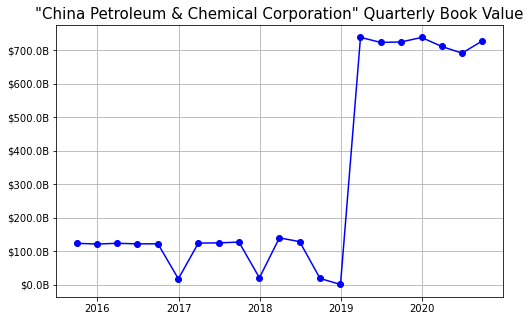

In [14]:
bookval_quart = (balsheet_quart_report_df.iloc[:, 2]) - (balsheet_quart_report_df.iloc[:, 19])
bookval_quart = pd.DataFrame(bookval_quart)
bookval_quart.columns = ['Quarterly Book Value']
bookval_quart['Fiscal Date Ending'] = balsheet_quart_report_df.iloc[: , 0]
bookval_quart = bookval_quart[['Fiscal Date Ending', 'Quarterly Book Value']]

# plot Quarterly Accounting Value

def billions(x, pos):
    return '${:1.1f}B'.format(x*1e-9)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(bookval_quart['Fiscal Date Ending'],
       bookval_quart['Quarterly Book Value'],
       marker = 'o',
        color = 'blue')
ax.yaxis.set_major_formatter(billions)
ax.set_title(f'"{co_name}" Quarterly Book Value', fontsize = 15)
ax.grid()
plt.show()

## Return On Sales Ratio 

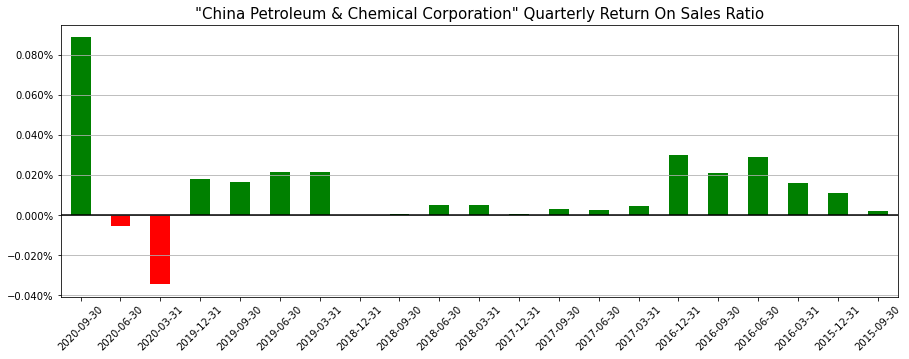

,Fiscal Date Ending,Quarterly Return On Sales Ratio
0,2020-09-30,8.88%
1,2020-06-30,-0.54%
2,2020-03-31,-3.45%
3,2019-12-31,1.81%
4,2019-09-30,1.64%


In [16]:
# Creating Quarterly Return On Sales Ratio data frame #
ros_ratio_quart = (incstat_quart_report_df.iloc[:, 25]) / (incstat_quart_report_df.iloc[:, 3])
ros_ratio_quart = pd.DataFrame(ros_ratio_quart)
ros_ratio_quart.columns = ['Quarterly Return On Sales Ratio']
ros_ratio_quart['Fiscal Date Ending'] = incstat_quart_report_df.iloc[: , 0]
ros_ratio_quart['Fiscal Date Ending'] = pd.to_datetime(ros_ratio_quart['Fiscal Date Ending']).dt.date
ros_ratio_quart = ros_ratio_quart[['Fiscal Date Ending', 'Quarterly Return On Sales Ratio']]

# First - plot Return On Sales Ratio #
ros_ratio_quart['values'] = ros_ratio_quart['Quarterly Return On Sales Ratio'] > 0

fig, ax = plt.subplots(figsize=(15, 5))
ros_ratio_quart['Quarterly Return On Sales Ratio'].plot(kind='bar', color = ros_ratio_quart['values'].map({True: 'g', False: 'r'}), ax=ax)
ax.axhline(0, color='k')
ax.set_xticklabels(ros_ratio_quart['Fiscal Date Ending'], rotation = 45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title(f'"{co_name}" Quarterly Return On Sales Ratio', fontsize = 15)
ax.grid(axis = 'y')
plt.show()

# Second - display Return On Sale Ratio data frame w/ 'Annual Return On Sales Ratio' as % #
ros_ratio_quart['Quarterly Return On Sales Ratio'] = ros_ratio_quart['Quarterly Return On Sales Ratio'].astype(float).map("{:.2%}".format)
del ros_ratio_quart['values']
ros_ratio_quart.head()

## Free Cash Flow v. Net Income (by Quarter)

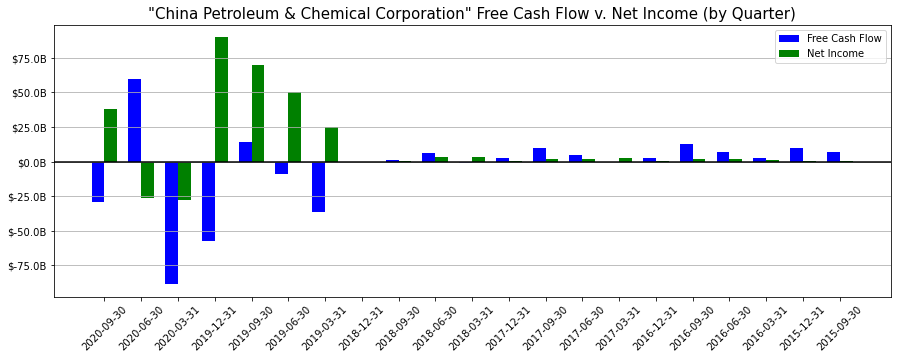

In [17]:
# Generate Quartertly Free Cash Flow v. Net Income #
fcf_quart_data = pd.DataFrame(cf_quart_report_df[['operatingCashflow', 'capitalExpenditures']])
fcf_quart = (fcf_quart_data.operatingCashflow) - (fcf_quart_data.capitalExpenditures)
fcf_quart = pd.DataFrame(fcf_quart)
fcf_quart.columns = ['Free Cash Flow']
fcf_quart['Fiscal Date Ending'] = cf_quart_report_df.iloc[:, 0]
fcf_quart['Fiscal Date Ending'] = pd.to_datetime(fcf_quart['Fiscal Date Ending']).dt.date
fcf_quart['Net Income'] = cf_quart_report_df.iloc[:, 28]
fcf_quart = fcf_quart[['Fiscal Date Ending', 'Free Cash Flow', 'Net Income']]
fcf_quart


labels = fcf_quart['Fiscal Date Ending']
fcf = fcf_quart['Free Cash Flow']
net_inc = fcf_quart['Net Income']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

def billions(x, pos):
    return '${:1.1f}B'.format(x*1e-9)

fig, ax = plt.subplots(figsize = (15, 5))
rects1 = ax.bar(x - width/2, fcf, width, label='Free Cash Flow', color='blue')
rects2 = ax.bar(x + width/2, net_inc, width, label='Net Income', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.axhline(0, color='k')
ax.set_title(f'"{co_name}" Free Cash Flow v. Net Income (by Quarter)', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation= 45)
ax.yaxis.set_major_formatter(billions)
ax.grid(axis = 'y')
ax.legend()
plt.show()

## Linear Regression Analysis - High & Low Difference v. Stock Volume

In [18]:
high = pd.to_numeric(intraday15_df['2. high'])
low = pd.to_numeric(intraday15_df['3. low'])
volume = pd.to_numeric(intraday15_df['5. volume'])
highlow_diff_df = pd.DataFrame(high)
highlow_diff_df['low'] = low 
highlow_diff_df['volume'] = volume
highlow_diff_df = highlow_diff_df.rename(columns = {'2. high' : 'high'})
highlow_diff_df['difference'] = (highlow_diff_df['high']) - (highlow_diff_df['low'])
highlow_diff_df = highlow_diff_df.sort_values('volume')
highlow_diff_df

,high,low,volume,difference
2021-02-09 09:00:00,49.9900,49.990,100,0.0000
2021-01-26 09:30:00,49.4000,49.400,100,0.0000
2021-01-27 16:15:00,48.3900,48.390,100,0.0000
2021-02-16 16:30:00,52.5000,52.500,100,0.0000
2021-01-29 09:15:00,48.4000,48.400,100,0.0000
...,...,...,...,...
2021-02-23 10:15:00,58.3000,57.665,34435,0.6350
2021-02-22 09:45:00,56.6439,55.830,35333,0.8139
2021-02-23 09:45:00,58.2100,57.530,38941,0.6800
2021-02-16 09:45:00,52.3600,51.860,50098,0.5000


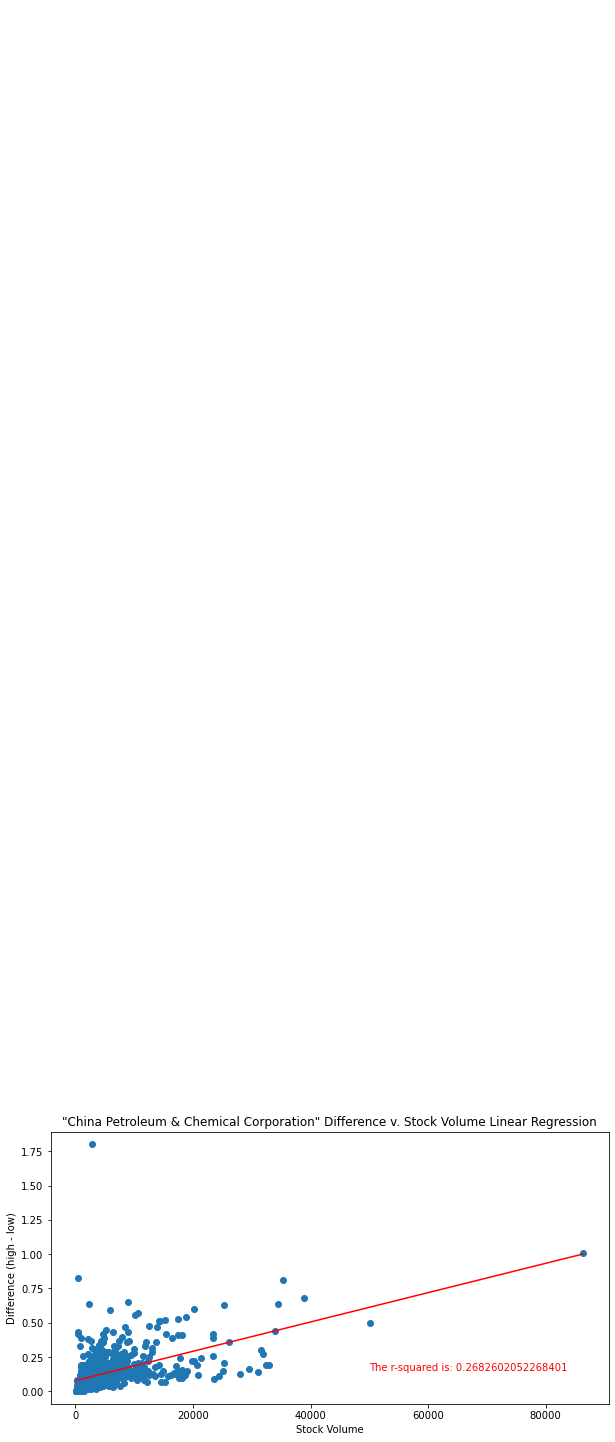

In [36]:
x_values = highlow_diff_df['volume']
y_values = highlow_diff_df['difference']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values,)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title(f'"{co_name}" Difference v. Stock Volume Linear Regression')
plt.xlabel('Stock Volume')
plt.ylabel('Difference (high - low)')
plt.annotate(f"The r-squared is: {rvalue**2}", xy =(50000, .15), color="red
plt.savefig('path/to/save/image/to.png')
plt.show()